# **Estimating CO2 Emissions using Linear Regression and Lazy Regression** 

# Variables

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


# Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [2]:
df = pd.read_csv('/kaggle/input/fuel-consumption-co2/fuel_consumption_CO2.csv')
df.columns = [col.lower() for col in df.columns]
df

,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


# Exploratory data analysis

## Let's check the dataframe

In [3]:
def check_dataframe(dataframe, head=5):
    print(' head '.upper().center(150, "*"))
    display(dataframe.head(head))
    print('\n',' tail '.upper().center(150, "*"))
    display(dataframe.tail(head))
    print('\n',' shape '.upper().center(150, "*"))
    print(dataframe.shape)
    print('\n',' dtype '.upper().center(150, "*"))
    print(dataframe.dtypes)
    print('\n',' columns '.upper().center(150, "*"))
    print(dataframe.columns)
    print('\n',' dataset info '.upper().center(150, "*"))
    print(dataframe.info())
    print('\n',' any null values '.upper().center(150, "*"))
    print(dataframe.isnull().values.any())
    print('\n',' null values '.upper().center(150, "*"))
    print(dataframe.isnull().sum().sort_values(ascending=False))
    print('\n',' descriptive statistics '.upper().center(150, "*"))
    display(dataframe.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_dataframe(df)

************************************************************************ HEAD ************************************************************************


,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244



 ************************************************************************ TAIL ************************************************************************


,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294



 *********************************************************************** SHAPE ************************************************************************
(1067, 13)

 *********************************************************************** DTYPE ************************************************************************
modelyear                     int64
make                         object
model                        object
vehicleclass                 object
enginesize                  float64
cylinders                     int64
transmission                 object
fueltype                     object
fuelconsumption_city        float64
fuelconsumption_hwy         float64
fuelconsumption_comb        float64
fuelconsumption_comb_mpg      int64
co2emissions                  int64
dtype: object

 ********************************************************************** COLUMNS ***********************************************************************
Index(['modelyear', 'make', 'model', 'vehiclecla

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
modelyear,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0,2014.00,2014.0,2014.0,2014.000,2014.0
enginesize,1067.0,3.346298,1.415895,1.0,1.60,1.6,2.00,3.4,4.30,5.4,6.0,6.534,8.4
cylinders,1067.0,5.794752,1.797447,3.0,4.00,4.0,4.00,6.0,8.00,8.0,8.0,12.000,12.0
fuelconsumption_city,1067.0,13.296532,4.101253,4.6,8.10,8.7,10.25,12.6,15.55,18.8,21.1,25.300,30.2
fuelconsumption_hwy,1067.0,9.474602,2.794510,4.9,6.10,6.6,7.50,8.8,10.85,13.4,14.6,19.234,20.5
fuelconsumption_comb,1067.0,11.580881,3.485595,4.7,7.23,7.8,9.00,10.9,13.35,16.5,18.0,22.236,25.8
fuelconsumption_comb_mpg,1067.0,26.441425,7.468702,11.0,16.00,17.0,21.00,26.0,31.00,36.0,39.0,47.000,60.0
co2emissions,1067.0,256.228679,63.372304,108.0,168.00,182.0,207.00,251.0,294.00,347.0,380.0,415.700,488.0


### Based on the results, there is no missing data and the outliers can be in some variables such as 'fuelconsumption_comb_mpg', However, we should examine them.

## Let's grag the categorical, numerical and cardinal variables

In [4]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # categorical variables
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtypes != 'O']
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtypes == 'O']
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # numerical variables
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # reporting section
    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # keeping the calculated values
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1067
Variables: 13
cat_cols: 4
num_cols: 6
cat_but_car: 3
num_but_cat: 2


In [5]:
cat_cols

['vehicleclass', 'fueltype', 'modelyear', 'cylinders']

In [6]:
num_cols

['enginesize',
 'fuelconsumption_city',
 'fuelconsumption_hwy',
 'fuelconsumption_comb',
 'fuelconsumption_comb_mpg',
 'co2emissions']

In [7]:
cat_but_car

['make', 'model', 'transmission']

### Let's check the cardinal variables

In [8]:
def cat_but_car(dataframe, variable):
    print(dataframe[variable].value_counts())

print(cat_but_car(df, 'make'))
print('--'*20)
print(cat_but_car(df, 'model'))
print('--'*20)
print(cat_but_car(df, 'transmission'))

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: make, dtype: int64
None
----------------------------------------
F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE                   6
              

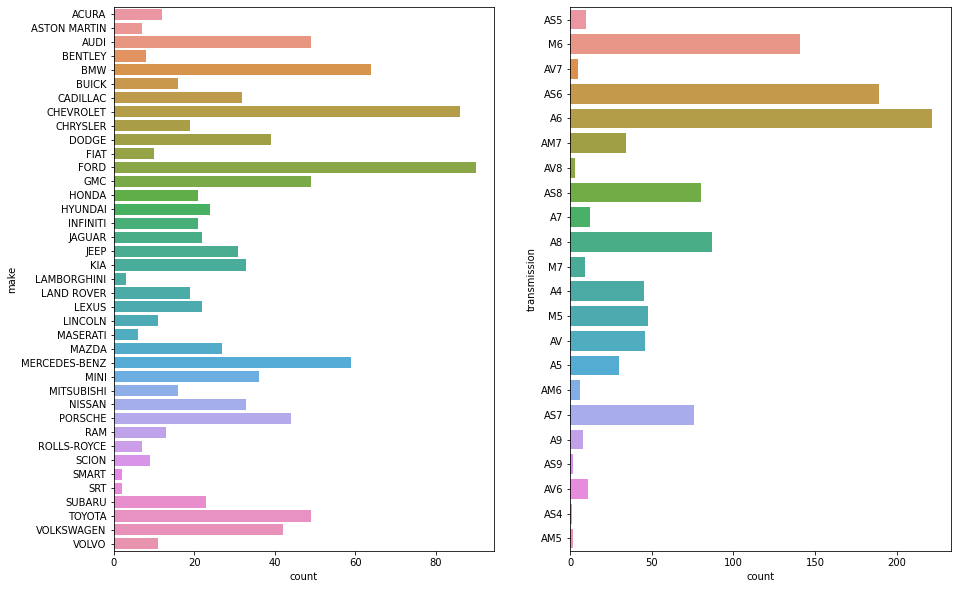

In [9]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(y=df['make'])
plt.subplot(1, 2, 2)
sns.countplot(y=df['transmission'])
plt.show()

### As you see that we can make some detailly analysis on the cardinal variables by using groupby method or pivot table

### Let's summarize the categorical variables


 ########## VEHICLECLASS ##########
                          VEHICLECLASS  RATIO (%)
MID-SIZE                           178      16.68
COMPACT                            172      16.12
SUV - SMALL                        154      14.43
SUV - STANDARD                     110      10.31
FULL-SIZE                           86       8.06
TWO-SEATER                          71       6.65
SUBCOMPACT                          65       6.09
PICKUP TRUCK - STANDARD             62       5.81
MINICOMPACT                         47       4.40
STATION WAGON - SMALL               36       3.37
VAN - PASSENGER                     25       2.34
VAN - CARGO                         22       2.06
MINIVAN                             14       1.31
PICKUP TRUCK - SMALL                12       1.12
SPECIAL PURPOSE VEHICLE              7       0.66
STATION WAGON - MID-SIZE             6       0.56


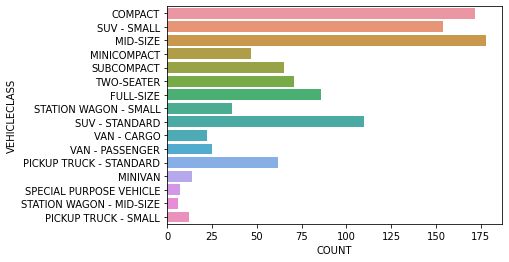


 ########## FUELTYPE ##########
   FUELTYPE  RATIO (%)
X       514      48.17
Z       434      40.67
E        92       8.62
D        27       2.53


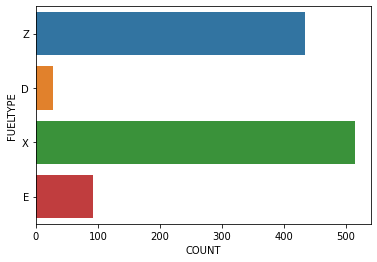


 ########## MODELYEAR ##########
      MODELYEAR  RATIO (%)
2014       1067      100.0


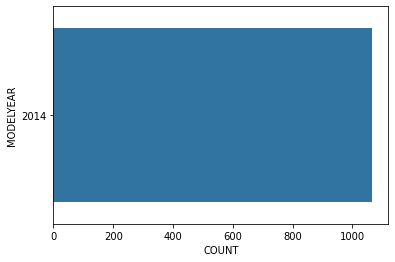


 ########## CYLINDERS ##########
    CYLINDERS  RATIO (%)
4         420      39.36
6         356      33.36
8         252      23.62
12         17       1.59
10          9       0.84
5           9       0.84
3           4       0.37


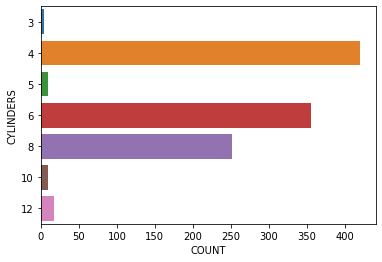

In [10]:
def cat_summary(dataframe, col_name, plot=False):
    print('\n', '#' * 10, col_name.upper(), 10 * '#')
    print(pd.DataFrame({
        col_name.upper(): dataframe[col_name].value_counts(),
        'RATIO (%)': round(100 * (dataframe[col_name].value_counts() / len(dataframe)), 2)
    }))

    if plot:
        sns.countplot(y=dataframe[col_name])
        plt.xlabel('COUNT')
        plt.ylabel(col_name.upper())
        plt.show(block=True)
        
for col in cat_cols:
    cat_summary(df, col, plot=True)

### Let's summarize the numerical variables

########## ENGINESIZE ##########
       ENGINESIZE
count     1067.00
mean         3.35
std          1.42
min          1.00
25%          2.00
50%          3.40
75%          4.30
max          8.40


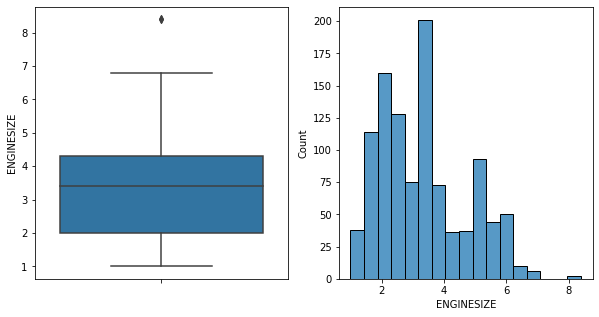

########## FUELCONSUMPTION_CITY ##########
       FUELCONSUMPTION_CITY
count               1067.00
mean                  13.30
std                    4.10
min                    4.60
25%                   10.25
50%                   12.60
75%                   15.55
max                   30.20


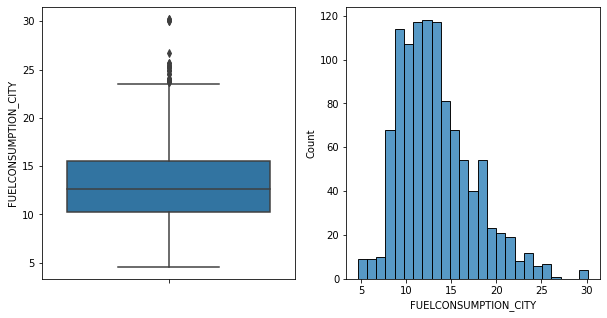

########## FUELCONSUMPTION_HWY ##########
       FUELCONSUMPTION_HWY
count              1067.00
mean                  9.47
std                   2.79
min                   4.90
25%                   7.50
50%                   8.80
75%                  10.85
max                  20.50


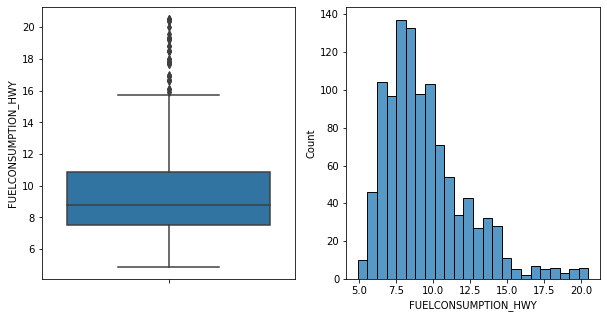

########## FUELCONSUMPTION_COMB ##########
       FUELCONSUMPTION_COMB
count               1067.00
mean                  11.58
std                    3.49
min                    4.70
25%                    9.00
50%                   10.90
75%                   13.35
max                   25.80


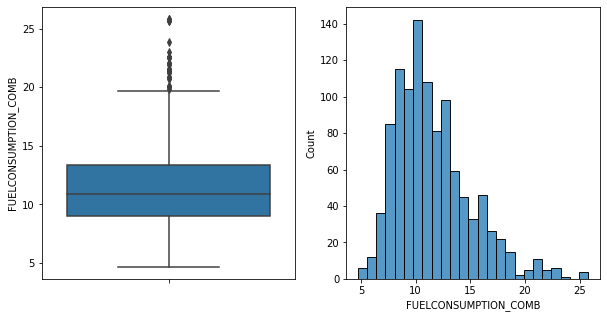

########## FUELCONSUMPTION_COMB_MPG ##########
       FUELCONSUMPTION_COMB_MPG
count                   1067.00
mean                      26.44
std                        7.47
min                       11.00
25%                       21.00
50%                       26.00
75%                       31.00
max                       60.00


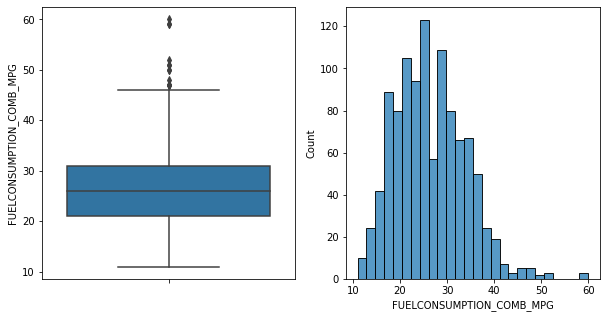

########## CO2EMISSIONS ##########
       CO2EMISSIONS
count       1067.00
mean         256.23
std           63.37
min          108.00
25%          207.00
50%          251.00
75%          294.00
max          488.00


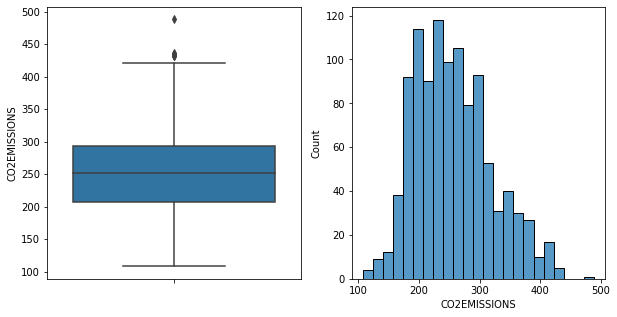

In [11]:
def num_summary(dataframe, numerical_col, plot=False):
    print('#' * 10, numerical_col.upper(), '#' * 10)
    print(pd.DataFrame({
        numerical_col.upper(): round(dataframe[numerical_col].describe().T, 2)
    }))

    if plot:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        sns.boxplot(y=dataframe[numerical_col])
        plt.ylabel(numerical_col.upper())
        plt.subplot(1, 2, 2)
        sns.histplot(x=dataframe[numerical_col])
        plt.xlabel(numerical_col.upper())
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)

### You see that there are some outliers in numerical variables. We can slightly remove them from the dataset

### Let's analyze a numeric target variable together with numeric variables

            TARGET_MEAN
enginesize             
1.0              148.67
1.2              150.75
1.3              143.00
1.4              180.20
1.5              163.08
1.6              190.63
1.8              180.46
2.0              207.17
2.1              212.00
2.4              220.38
2.5              210.50
2.7              237.55
3.0              259.57
3.2              257.89
3.3              261.80
3.4              238.50
3.5              248.04
3.6              264.61
3.7              269.26
3.8              269.06
4.0              301.64
4.2              350.00
4.3              292.40
4.4              312.00
4.6              335.00
4.7              312.24
4.8              348.30
5.0              315.13
5.2              381.17
5.3              330.75
5.4              373.38
5.5              322.21
5.6              343.17
5.7              330.88
5.8              304.00
5.9              359.00
6.0              397.21
6.2              346.22
6.3              361.00
6.4             

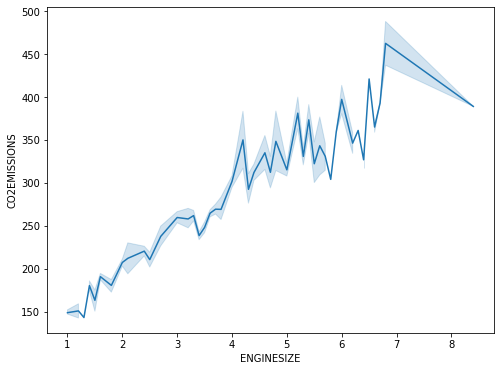

                      TARGET_MEAN
fuelconsumption_city             
4.6                         108.0
4.7                         110.0
5.3                         126.0
5.5                         130.0
5.6                         131.0
...                           ...
25.5                        368.0
25.7                        354.0
26.7                        382.0
30.0                        411.0
30.2                        413.0

[167 rows x 1 columns]



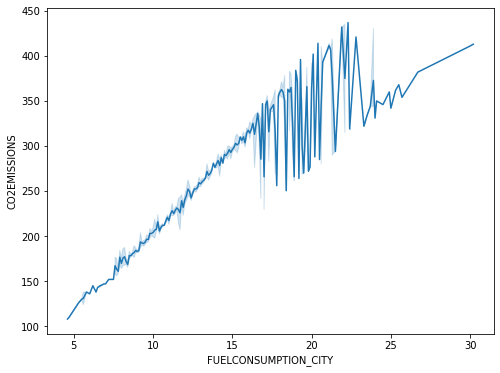

                     TARGET_MEAN
fuelconsumption_hwy             
4.9                       109.33
5.1                       192.00
5.2                       124.00
5.4                       161.00
5.5                       171.33
...                          ...
19.3                      362.00
19.6                      360.00
20.0                      368.00
20.4                      411.00
20.5                      402.67

[118 rows x 1 columns]



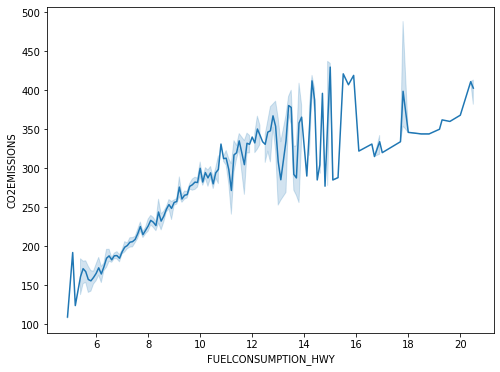

                      TARGET_MEAN
fuelconsumption_comb             
4.7                         108.0
4.8                         110.0
5.4                         124.0
5.5                         126.0
5.6                         129.0
...                           ...
22.6                        362.0
23.0                        368.0
23.9                        382.0
25.7                        411.0
25.8                        413.0

[148 rows x 1 columns]



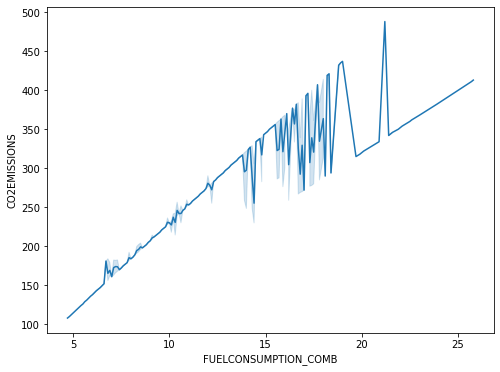

                          TARGET_MEAN
fuelconsumption_comb_mpg             
11                             412.00
12                             366.33
13                             356.40
14                             323.44
15                             357.67
16                             352.74
17                             343.50
18                             338.68
19                             334.83
20                             303.84
21                             308.54
22                             294.40
23                             280.72
24                             272.48
25                             259.82
26                             250.69
27                             239.63
28                             231.80
29                             225.02
30                             215.94
31                             209.79
32                             201.68
33                             198.74
34                             193.33
35          

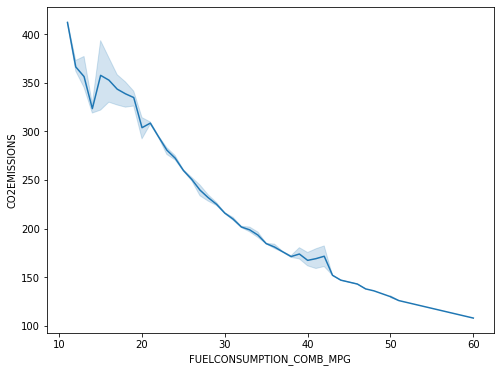

In [12]:
def num_target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({
        'TARGET_MEAN': round(dataframe.groupby(numerical_col)[target].mean(), 2)
    }), end='\n\n')

    if plot:
        plt.figure(figsize=(8, 6))
        sns.lineplot(y=dataframe[target], x=dataframe[numerical_col])
        plt.ylabel(target.upper())
        plt.xlabel(numerical_col.upper())
        plt.show(block=True)

# Lets remove the target variable from the numerical variables
num_cols = [col for col in num_cols if 'co2emissions' not in col]
for col in num_cols:
    num_target_summary_with_num(df, 'co2emissions', col, plot=True)

### Let's find the highly correlated variables and delete them if necessary

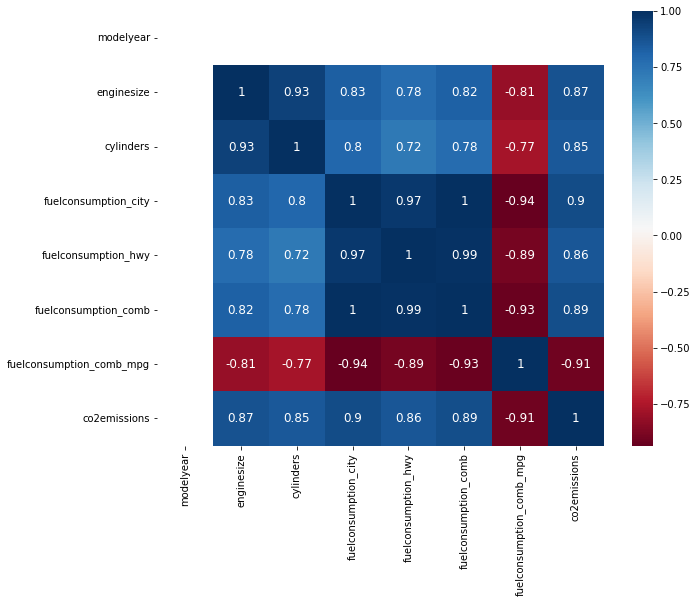

['cylinders',
 'fuelconsumption_hwy',
 'fuelconsumption_comb',
 'fuelconsumption_comb_mpg',
 'co2emissions']

In [13]:
def high_correlated_cols(dataframe, corr_th=0.90, plot=False):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if plot:
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, cmap='RdBu', annot=True, annot_kws={'fontsize': 12})
        plt.show(block=True)

    return drop_list

drop_list = high_correlated_cols(df, plot=True)
drop_list

# Feature Engineering

## Let's check the outliers

In [14]:
def outlier_threshholds(dataframe, col_name, q1=0.05, q3=0.95):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3 + 1.5 * interquantile_range
    low_limit = quantile1 - 1.5 * interquantile_range

    return low_limit, up_limit


for col in num_cols:
    low_limit, up_limit = outlier_threshholds(df, col)
    print(low_limit, up_limit)

-5.0 12.600000000000001
-11.400000000000004 40.60000000000001
-6.65 27.35
-8.925 34.155
-18.5 73.5


### Let's find whether there are outliers or not

In [15]:
def check_outliers(dataframe, col_name):
    low_limit, up_limit = outlier_threshholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col, check_outliers(df, col))


enginesize False
fuelconsumption_city False
fuelconsumption_hwy False
fuelconsumption_comb False
fuelconsumption_comb_mpg False


### Therefore, there is not outlier according the the determined thresholds (q1=0.05, q3=0.95). Since there is no missing value, we can continue with encoding and standardization. Because of this is a basic study, no feature extraction will be made and we are going to apply a linear regression model to predict the C=2 emissions. 

## Let's check the ordinality of the categorical variables to determine whether a label encoding is applied or not. 

In [16]:
def ordinal_columns(dataframe, variable):
    print(dataframe[variable].value_counts())
    
for col in cat_cols:
    print('--'*50)
    ordinal_columns(df, col)

----------------------------------------------------------------------------------------------------
MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: vehicleclass, dtype: int64
----------------------------------------------------------------------------------------------------
X    514
Z    434
E     92
D     27
Name: fueltype, dtype: int64
----------------------------------------------------------------------------------------------------
2014    1067
Name: modelyear, dtype: int64
--------------------------------------------

### You see that there is an ordinality between the values of fueltype and cylinders. However, there is no binary variable. Therefore, we should apply onehot encoding to those variables

## Let's make OneHot encoding

In [17]:
def one_hot_encoder(dataframe, categorical_cols, dropfirst=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=dropfirst)
    return dataframe

df = pd.read_csv('/kaggle/input/fuel-consumption-co2/fuel_consumption_CO2.csv')
df.columns = [col.lower() for col in df.columns]
dff = df.copy()
ohe_cols = [col for col in dff.columns if 20 >= dff[col].nunique()]
dff = one_hot_encoder(dff, ohe_cols)
dff

,make,model,enginesize,transmission,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions,vehicleclass_FULL-SIZE,vehicleclass_MID-SIZE,vehicleclass_MINICOMPACT,vehicleclass_MINIVAN,vehicleclass_PICKUP TRUCK - SMALL,vehicleclass_PICKUP TRUCK - STANDARD,vehicleclass_SPECIAL PURPOSE VEHICLE,vehicleclass_STATION WAGON - MID-SIZE,vehicleclass_STATION WAGON - SMALL,vehicleclass_SUBCOMPACT,vehicleclass_SUV - SMALL,vehicleclass_SUV - STANDARD,vehicleclass_TWO-SEATER,vehicleclass_VAN - CARGO,vehicleclass_VAN - PASSENGER,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_10,cylinders_12,fueltype_E,fueltype_X,fueltype_Z
0,ACURA,ILX,2.0,AS5,9.9,6.7,8.5,33,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,ACURA,ILX,2.4,M6,11.2,7.7,9.6,29,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,ACURA,ILX HYBRID,1.5,AV7,6.0,5.8,5.9,48,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,ACURA,MDX 4WD,3.5,AS6,12.7,9.1,11.1,25,255,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,ACURA,RDX AWD,3.5,AS6,12.1,8.7,10.6,27,244,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,VOLVO,XC60 AWD,3.0,AS6,13.4,9.8,11.8,24,271,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1063,VOLVO,XC60 AWD,3.2,AS6,13.2,9.5,11.5,25,264,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1064,VOLVO,XC70 AWD,3.0,AS6,13.4,9.8,11.8,24,271,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1065,VOLVO,XC70 AWD,3.2,AS6,12.9,9.3,11.3,25,260,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


### Let's check the variables again

In [18]:
cat_cols, num_cols, cat_but_car = grab_col_names(dff)

Observations: 1067
Variables: 33
cat_cols: 24
num_cols: 6
cat_but_car: 3
num_but_cat: 24


### Let's see the categorical variables

In [19]:
cat_cols

['vehicleclass_FULL-SIZE',
 'vehicleclass_MID-SIZE',
 'vehicleclass_MINICOMPACT',
 'vehicleclass_MINIVAN',
 'vehicleclass_PICKUP TRUCK - SMALL',
 'vehicleclass_PICKUP TRUCK - STANDARD',
 'vehicleclass_SPECIAL PURPOSE VEHICLE',
 'vehicleclass_STATION WAGON - MID-SIZE',
 'vehicleclass_STATION WAGON - SMALL',
 'vehicleclass_SUBCOMPACT',
 'vehicleclass_SUV - SMALL',
 'vehicleclass_SUV - STANDARD',
 'vehicleclass_TWO-SEATER',
 'vehicleclass_VAN - CARGO',
 'vehicleclass_VAN - PASSENGER',
 'cylinders_4',
 'cylinders_5',
 'cylinders_6',
 'cylinders_8',
 'cylinders_10',
 'cylinders_12',
 'fueltype_E',
 'fueltype_X',
 'fueltype_Z']

### Let's see the numerical variables and remove the target variable from the numerical variables

In [20]:
num_cols = [col for col in num_cols if 'co2emissions' not in col]
num_cols

['enginesize',
 'fuelconsumption_city',
 'fuelconsumption_hwy',
 'fuelconsumption_comb',
 'fuelconsumption_comb_mpg']

### Let's see the cardinal variables and remove them from the dataset

In [21]:
cat_but_car
dff = dff.drop(cat_but_car, axis=1)
dff

,enginesize,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions,vehicleclass_FULL-SIZE,vehicleclass_MID-SIZE,vehicleclass_MINICOMPACT,vehicleclass_MINIVAN,vehicleclass_PICKUP TRUCK - SMALL,vehicleclass_PICKUP TRUCK - STANDARD,vehicleclass_SPECIAL PURPOSE VEHICLE,vehicleclass_STATION WAGON - MID-SIZE,vehicleclass_STATION WAGON - SMALL,vehicleclass_SUBCOMPACT,vehicleclass_SUV - SMALL,vehicleclass_SUV - STANDARD,vehicleclass_TWO-SEATER,vehicleclass_VAN - CARGO,vehicleclass_VAN - PASSENGER,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_10,cylinders_12,fueltype_E,fueltype_X,fueltype_Z
0,2.0,9.9,6.7,8.5,33,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2.4,11.2,7.7,9.6,29,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1.5,6.0,5.8,5.9,48,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,3.5,12.7,9.1,11.1,25,255,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,3.5,12.1,8.7,10.6,27,244,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,3.0,13.4,9.8,11.8,24,271,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1063,3.2,13.2,9.5,11.5,25,264,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1064,3.0,13.4,9.8,11.8,24,271,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1065,3.2,12.9,9.3,11.3,25,260,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


## Let's make standardization

### Let's check the outliers again

########## ENGINESIZE ##########
       ENGINESIZE
count     1067.00
mean         3.35
std          1.42
min          1.00
25%          2.00
50%          3.40
75%          4.30
max          8.40


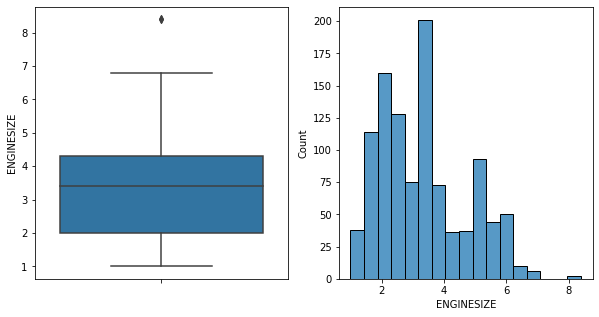

########## FUELCONSUMPTION_CITY ##########
       FUELCONSUMPTION_CITY
count               1067.00
mean                  13.30
std                    4.10
min                    4.60
25%                   10.25
50%                   12.60
75%                   15.55
max                   30.20


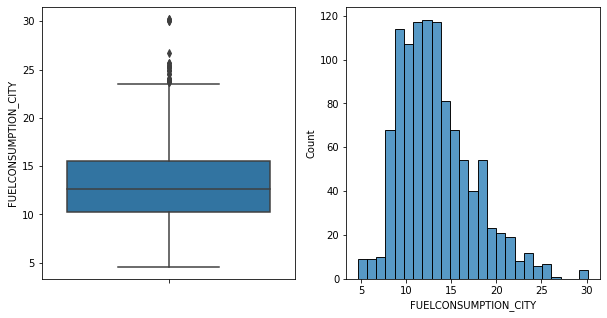

########## FUELCONSUMPTION_HWY ##########
       FUELCONSUMPTION_HWY
count              1067.00
mean                  9.47
std                   2.79
min                   4.90
25%                   7.50
50%                   8.80
75%                  10.85
max                  20.50


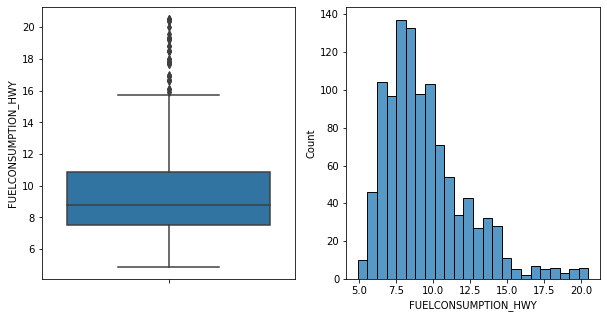

########## FUELCONSUMPTION_COMB ##########
       FUELCONSUMPTION_COMB
count               1067.00
mean                  11.58
std                    3.49
min                    4.70
25%                    9.00
50%                   10.90
75%                   13.35
max                   25.80


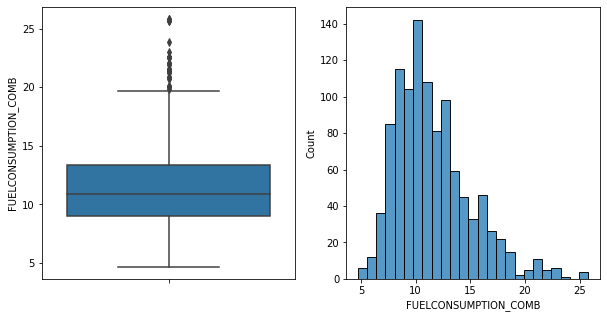

########## FUELCONSUMPTION_COMB_MPG ##########
       FUELCONSUMPTION_COMB_MPG
count                   1067.00
mean                      26.44
std                        7.47
min                       11.00
25%                       21.00
50%                       26.00
75%                       31.00
max                       60.00


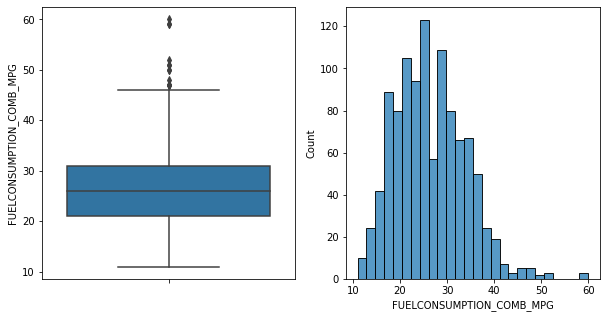

In [22]:
for col in num_cols:
    num_summary(dff, col, plot=True)

### According to the above summary analysis of the numerical variables, there are some outliers in the variables. Therefore, we can make a robust standardization, which does not affect from the outliers

In [23]:
robust_scaler = RobustScaler()
dff[num_cols] = robust_scaler.fit_transform(dff[num_cols])
dff

,enginesize,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions,vehicleclass_FULL-SIZE,vehicleclass_MID-SIZE,vehicleclass_MINICOMPACT,vehicleclass_MINIVAN,vehicleclass_PICKUP TRUCK - SMALL,vehicleclass_PICKUP TRUCK - STANDARD,vehicleclass_SPECIAL PURPOSE VEHICLE,vehicleclass_STATION WAGON - MID-SIZE,vehicleclass_STATION WAGON - SMALL,vehicleclass_SUBCOMPACT,vehicleclass_SUV - SMALL,vehicleclass_SUV - STANDARD,vehicleclass_TWO-SEATER,vehicleclass_VAN - CARGO,vehicleclass_VAN - PASSENGER,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_10,cylinders_12,fueltype_E,fueltype_X,fueltype_Z
0,-0.608696,-0.509434,-0.626866,-0.551724,0.7,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,-0.434783,-0.264151,-0.328358,-0.298851,0.3,221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,-0.826087,-1.245283,-0.895522,-1.149425,2.2,136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0.043478,0.018868,0.089552,0.045977,-0.1,255,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0.043478,-0.094340,-0.029851,-0.068966,0.1,244,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,-0.173913,0.150943,0.298507,0.206897,-0.2,271,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1063,-0.086957,0.113208,0.208955,0.137931,-0.1,264,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1064,-0.173913,0.150943,0.298507,0.206897,-0.2,271,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1065,-0.086957,0.056604,0.149254,0.091954,-0.1,260,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


# Simple Linear Regression Modeling

## Let's select dependent and independent variable

In [24]:
y = dff[['co2emissions']]
X = dff.drop('co2emissions', axis=1)

## Let's bulid the train and test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((853, 29), (214, 29))

## Let's create and fit the model

In [26]:
linear_model = LinearRegression().fit(X_train, y_train)

## Let's fing the intercept of the model

In [27]:
linear_model.intercept_

array([290.94071261])

## Let's fing the coefficients of the model

In [28]:
linear_model.coef_

array([[ 3.07807159e+00, -1.05689113e+01, -6.78882916e+00,
         9.30137684e+01, -1.60275807e+01, -4.47023353e-02,
        -4.42526040e-01, -9.34613616e-01, -3.55672301e-01,
         1.18715735e+00,  1.94481952e+00, -1.91598491e+00,
         1.49127375e-01, -9.24014765e-01, -8.30542996e-01,
        -1.27218855e+00,  1.27736265e+00,  2.90473733e-02,
        -1.15909411e+00,  4.37100854e+00, -5.95937361e+00,
        -8.63515261e+00, -5.30182272e+00, -3.33258203e+00,
         6.95861503e+00,  5.18966174e+00, -1.40477572e+02,
        -3.17798888e+01, -3.28549988e+01]])

## Let's caculate the RMSE and R2 values for train and test sets

### Train set

In [29]:
y_pred_train = linear_model.predict(X_train)
print('The RMSE value for train set is', np.sqrt(mean_squared_error(y_train, y_pred_train)))

The RMSE value for train set is 5.202672625480476


In [30]:
print('The R2 score for train set is', r2_score(y_train.values, y_pred_train))

The R2 score for train set is 0.9932350879108589


#### Test set

In [31]:
y_pred_test = linear_model.predict(X_test)
print('The RMSE value for test set is', np.sqrt(mean_squared_error(y_test, y_pred_test)))

The RMSE value for test set is 5.509539184149913


In [32]:
print('The R2 value for test set is', r2_score(y_test.values, y_pred_test))

The R2 value for test set is 0.9925168457619381


## Let's show the correlation between the actual and predicted CO2 emissions

### For train set

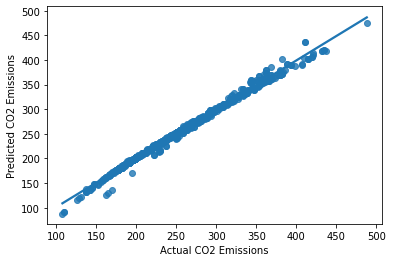

In [33]:
sns.regplot(x=y_train.values, y=y_pred_train)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.show()

### For test set

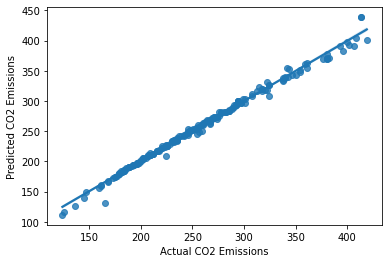

In [34]:
sns.regplot(x=y_test.values, y=y_pred_test)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.show()

### As you see that there is a high correlation between the observed and predicted values of CO2 emissions for both train set and test set

## Let's make a 10-fold cross validation

In [35]:
print('The cross validation score of the model is', np.mean(np.sqrt(-cross_val_score(linear_model, X, y, cv=10, scoring='neg_mean_squared_error'))))

The cross validation score of the model is 5.521490169793724


## On the other hand, Lazy Predict helps to build many basic models without using a lot of code and helps to understand which models work better without any parameter adjustments. Let's write some code and predict customer churn fastly.

## Let's install the lazypredict module

In [36]:
!pip install lazypredict

In [37]:
from lazypredict.Supervised import LazyRegressor

In [38]:
X_new_train, y_new_train, X_new_test, y_new_test = train_test_split(X, y, test_size=0.25, random_state=19)
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_new_train, y_new_train, X_new_test, y_new_test )
print(models)

100%|██████████| 42/42 [00:14<00:00,  2.90it/s]

                               Adjusted R-Squared  R-Squared     RMSE  Time Taken
Model                                                                            
PoissonRegressor                             1.00       1.00     2.24        0.05
XGBRegressor                                 1.00       1.00     3.72        0.57
LGBMRegressor                                1.00       1.00     4.05        0.15
HuberRegressor                               1.00       1.00     4.13        0.09
HistGradientBoostingRegressor                0.99       1.00     4.19        0.43
TransformedTargetRegressor                   0.99       0.99     4.40        0.02
LinearRegression                             0.99       0.99     4.40        0.02
LassoLarsIC                                  0.99       0.99     4.41        0.04
LassoLarsCV                                  0.99       0.99     4.42        0.08
RidgeCV                                      0.99       0.99     4.42        0.03
BayesianRidge   

# **Thank you for checking my notebook!**